In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

## Assumptions of Multivariable Linear Regression
1. linear relationship
    - features in regression need linear relationship with outcome
2. multivariate normality
    - errors from model should be normally distributed
3. homoscedasticity
    - distribution of error terms (its scedasticity) should be consistent for all predicted values (or homoscedastic)
4. low multicollinearity
    - correlations among features should be low or nonexistent

In [99]:
data_o = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

In [143]:
data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_o), columns=data_o.columns)

In [144]:
# Instantiate and fit our model.
regr = LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
regr.coef_

array([[ 0.53277975,  0.3681531 , -0.00464421]])

In [146]:
regr.intercept_

array([0.05396116])

In [147]:
regr.score(X, Y)

0.8972106381789521

In [148]:
data

In [150]:
np.corrcoef(data.TV, data.Sales)

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [151]:
np.corrcoef(data.Radio, data.Sales)

array([[1.        , 0.57622257],
       [0.57622257, 1.        ]])

In [152]:
np.corrcoef(data.Newspaper, data.Sales)

array([[1.        , 0.22829903],
       [0.22829903, 1.        ]])

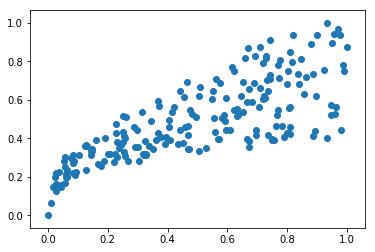

In [153]:
plt.scatter(data.TV, data.Sales)

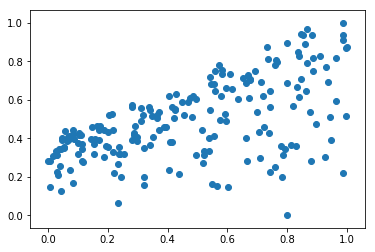

In [154]:
plt.scatter(data.Radio, data.Sales)

In [278]:
data['TV_radio'] = data.TV + data.Radio

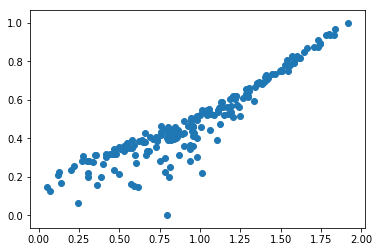

In [279]:
plt.scatter(data.TV_radio, data.Sales)

In [280]:
np.corrcoef(data.TV_radio, data.Sales)

array([[1.        , 0.93301923],
       [0.93301923, 1.        ]])

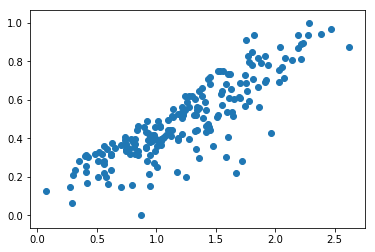

In [281]:
plt.scatter(data.TV + data.Radio + data.Newspaper, data.Sales)

In [282]:
np.corrcoef(data.TV + data.Radio + data.Newspaper, data.Sales)

array([[1.       , 0.8579247],
       [0.8579247, 1.       ]])

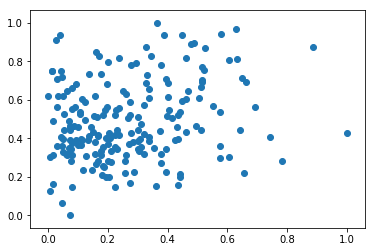

In [155]:
plt.scatter(data.Newspaper, data.Sales)

In [175]:
data['TV_log'] = data.TV.apply(lambda x: np.log(x))

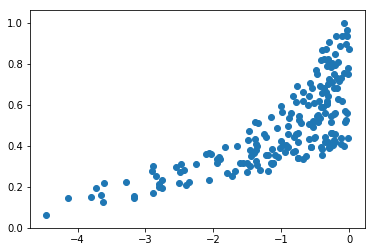

In [176]:
plt.scatter(data.TV_log, data.Sales)

In [256]:
data['TV_sqrt'] = np.power(data.TV, .6)

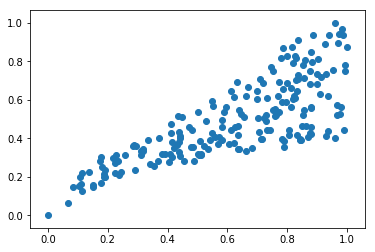

In [257]:
plt.scatter(data.TV_sqrt, data.Sales)

In [258]:
np.corrcoef(data.TV_sqrt, data.Sales)

array([[1.        , 0.79011185],
       [0.79011185, 1.        ]])

In [335]:
# Instantiate and fit our model.
regr = LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['Radio','TV_sqrt']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [336]:
regr.coef_

array([[0.37698604, 0.61218972]])

In [337]:
regr.intercept_

array([-0.06672399])

In [338]:
regr.score(X,Y)

0.9256990255603927

In [267]:
predicted = regr.predict(X).ravel()

In [268]:
actual = data['Sales']

In [269]:
residual = actual = predicted

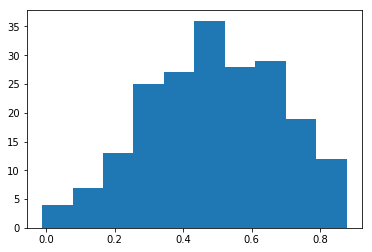

In [270]:
plt.hist(residual)
plt.show()

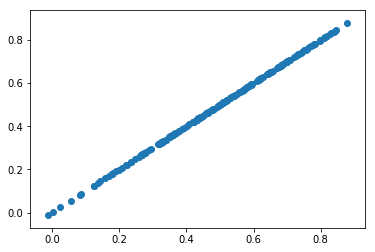

In [271]:
plt.scatter(predicted, residual)